In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad("../data/MCF10A.h5ad")

In [3]:
adata = adata[adata.obs['treatment_id'] == 'Mock'].copy()

In [4]:
adata.var_names = adata.var["gene_short_name"].astype(str)
adata.var_names_make_unique()

In [5]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    flavor='seurat_v3' 
)

adata = adata[:, adata.var["highly_variable"]].copy()

/mnt/home/islamsa3/.local/lib/python3.12/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [6]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/mnt/gs21/scratch/islamsa3/fm-project/.conda/lib/python3.12/site-packages/scanpy/neighbors/__init__.py:577: UserWarning: You’re trying to run this on 2000 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  x = _choose_representation(self._adata, use_rep=use_rep, n_pcs=n_pcs)
/mnt/gs21/scratch/islamsa3/fm-project/.conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
adata.obs['cell_type'] = adata.obs['spatial_id']

In [8]:
replacement_map = {
    'inner': 'Epithelial',
    'outer': 'Mesenchymal'
}
adata.obs['cell_type'] = adata.obs['cell_type'].replace(replacement_map)

/tmp/ipykernel_2233193/133191053.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['cell_type'] = adata.obs['cell_type'].replace(replacement_map)


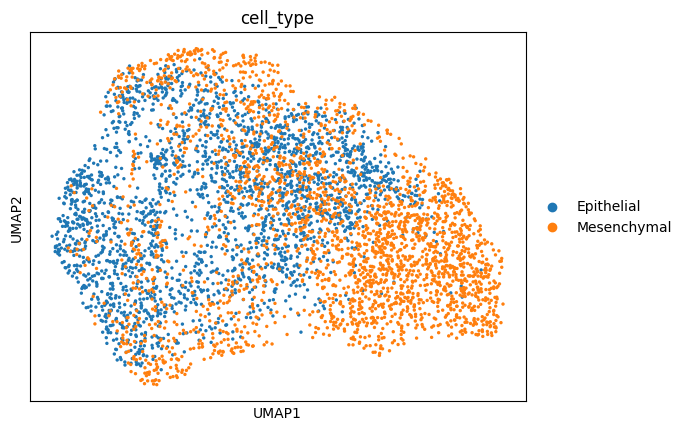

In [9]:
sc.pl.umap(adata, color="cell_type")

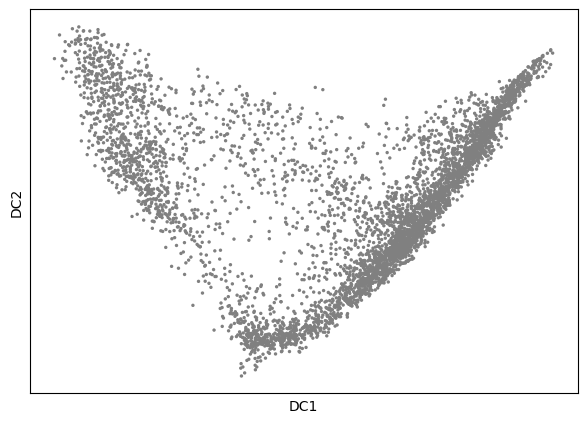

In [10]:
sc.tl.diffmap(adata)
sc.pl.scatter(adata, basis="diffmap")

In [11]:
adata.obsm["X_diffmap"][:, 1].argmin()

1174

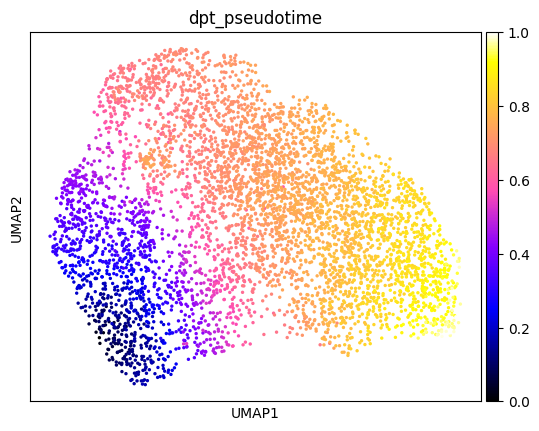

In [12]:
adata.uns['iroot'] = 1174
sc.tl.dpt(adata)
sc.pl.umap(adata, color="dpt_pseudotime", color_map="gnuplot2")

In [13]:
sorted_indices = adata.obs['dpt_pseudotime'].argsort()
adata = adata[sorted_indices].copy()

In [14]:
adata

AnnData object with n_obs × n_vars = 5027 × 2000
    obs: 'cell', 'total_umis', 'sample', 'TSNE.1', 'TSNE.2', 'Size_Factor', 'treatment_id', 'spatial_id', 'cell_type', 'dpt_pseudotime'
    var: 'id', 'gene_short_name', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'X_name', 'hvg', 'pca', 'neighbors', 'umap', 'cell_type_colors', 'diffmap_evals', 'iroot'
    obsm: 'X_pca', 'X_umap', 'X_diffmap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [15]:
adata.var.index.name = 'gene_id'  

In [16]:
adata.write('../data/emt.h5ad')